<a href="https://colab.research.google.com/github/yuliapratiwi169/Handling-Missing-Value-and-Outliers-/blob/main/Handling_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anggota Kelompok 
1. Yulia Pratiwi (G1A021029)
2. Zabrila Amrina Zadia Putri (G1A021053)

In [136]:
#MengImport library yang dibutuhkan

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [75]:
#MENAMBAHKAN DATASET
# Data yang digunakan adalah data belanja Konsumen dimana terdapat jenis kelamin, umur penghasilan dan pengeluaran

df = pd.read_csv("https://raw.githubusercontent.com/yuliapratiwi169/Handling-Missing-Value-and-Outliers-/main/shopping_data_missingvalue.csv")
df.head()

,CustomerID,Genre,Age,Income,SpendingScore
0,1,Male,19.0,15,39
1,2,Male,NaN,15,81
2,3,Female,20.0,16,6
3,4,Female,23.0,16,77
4,5,Female,31.0,17,33


In [94]:
#descriptive statistics dataset

df.describe()

,CustomerID,Age,Income,SpendingScore
count,200.000000,192.000000,200.000000,200.000000
mean,100.500000,47.838542,60.560000,50.375000
std,57.879185,45.050175,26.264721,25.626705
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,29.000000,41.500000,34.750000
50%,100.500000,37.500000,61.500000,50.000000
75%,150.250000,50.000000,78.000000,73.000000
max,200.000000,319.000000,137.000000,99.000000


In [76]:
#Panjang Dataset

df.shape

(200, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


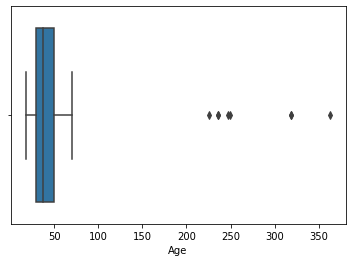

In [78]:
#Mengidentifikasi Outliers Menggunakan Boxplot
sns.boxplot(df.Age)

In [89]:
# index Outlier
print(np.where(df['Age']>150))

(array([ 38,  96, 115, 117, 138, 144, 189]),)


In [79]:
#menggunakan skor IQR untuk menghilangkan outlier.

Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


21.0


In [80]:
#kode di bawah ini menghapus outlier berdasarkan rentang IQR dan menyimpan hasilnya dalam bingkai data 'df_new'

df_new = df[~((df.Age < (Q1 - 1.5 * IQR)) | (df.Age > (Q3 + 1.5 * IQR)))]
df_new.head()

,CustomerID,Genre,Age,Income,SpendingScore
0,1,Male,19.0,15,39
1,2,Male,NaN,15,81
2,3,Female,20.0,16,6
3,4,Female,23.0,16,77
4,5,Female,31.0,17,33


In [92]:
# Panjang Data setelah outlier dihapus dengan menggunakan rentang IQR

df_new.shape

(192, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


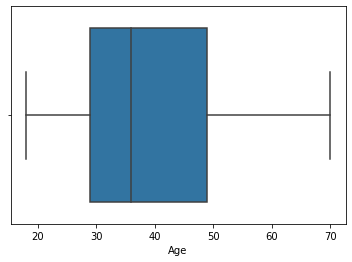

In [84]:
#Tampilan dataset setelah outlier dihapus
sns.boxplot(df_new.Age)

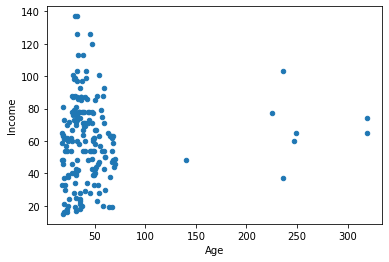

In [96]:
#Mengidentifikasi Outlier menggunakan Scatter plot

df.plot(x='Age',y='Income',kind = 'scatter') 
plt.show()

In [98]:
# Menemukan korelasi antara semua variabel numerik

df.select_dtypes(['float64' , 'int64']).corr()

,CustomerID,Age,Income,SpendingScore
CustomerID,1.000000,0.043783,0.977548,0.003186
Age,0.043783,1.000000,0.041694,-0.167593
Income,0.977548,0.041694,1.000000,-0.000776
SpendingScore,0.003186,-0.167593,-0.000776,1.000000


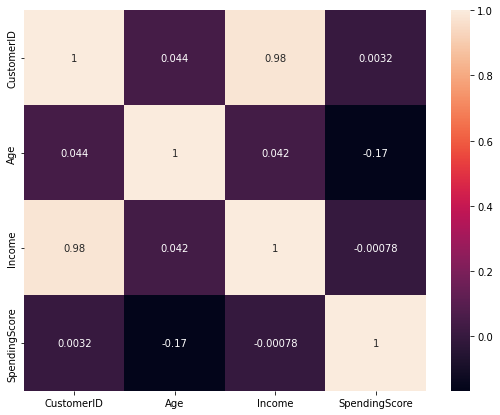

In [137]:
# ini adalah tampilan korelasi menggunakan heatmap  semakin pekat warnannya maka korelasinya akan semakin kuat

plt = plt.figure(figsize=(9,7)) 
sns.heatmap(df.select_dtypes(['float64' , 'int64']).corr(), annot=True) 
plt.show()